In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("Setup Complete")

Setup Complete


# Select a dataset

We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (Iris setosa, Iris versicolor, and Iris virginica).

![iris](RcxYYBA.jpeg)

# Load and examine the data

Each row in the dataset corresponds to a different flower. There are four measurements: the sepal length and width, along with the petal length and width. We also keep track of the corresponding species.


In [2]:
# Read the file into a variable iris_data
iris_data = pd.read_csv("iris.csv", index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Histograms

Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.distplot command.

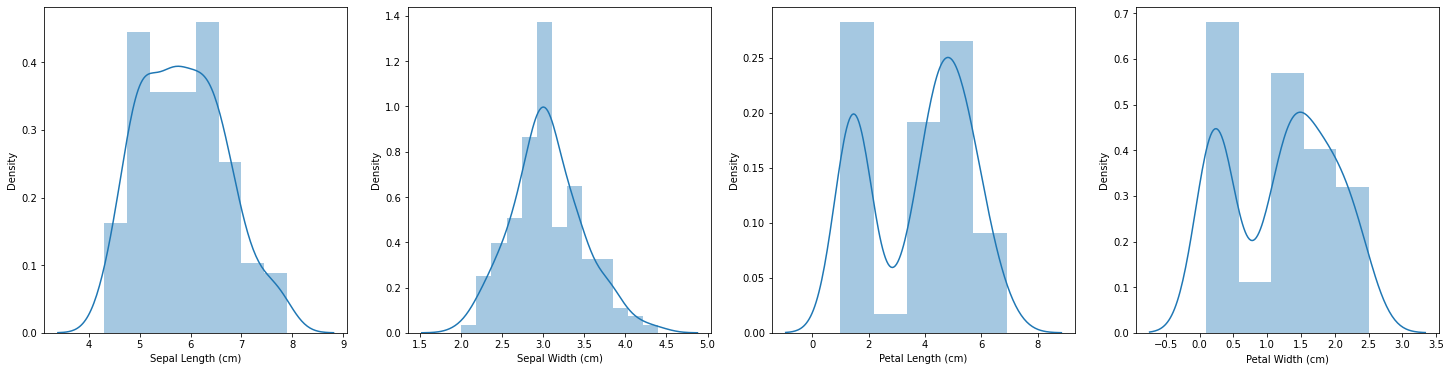

In [3]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.distplot(a=iris_data[cols[0]], hist=True)
plt.subplot(142)
sns.distplot(a=iris_data[cols[1]], hist=True)
plt.subplot(143)
sns.distplot(a=iris_data[cols[2]], hist=True)
plt.subplot(144)
sns.distplot(a=iris_data[cols[3]], hist=True, norm_hist=True)
plt.show()

# Density plots

The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram. To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= has identical functionality as when we made the histogram above).

For a discussion of histograms and KDE please visiti, for example: https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

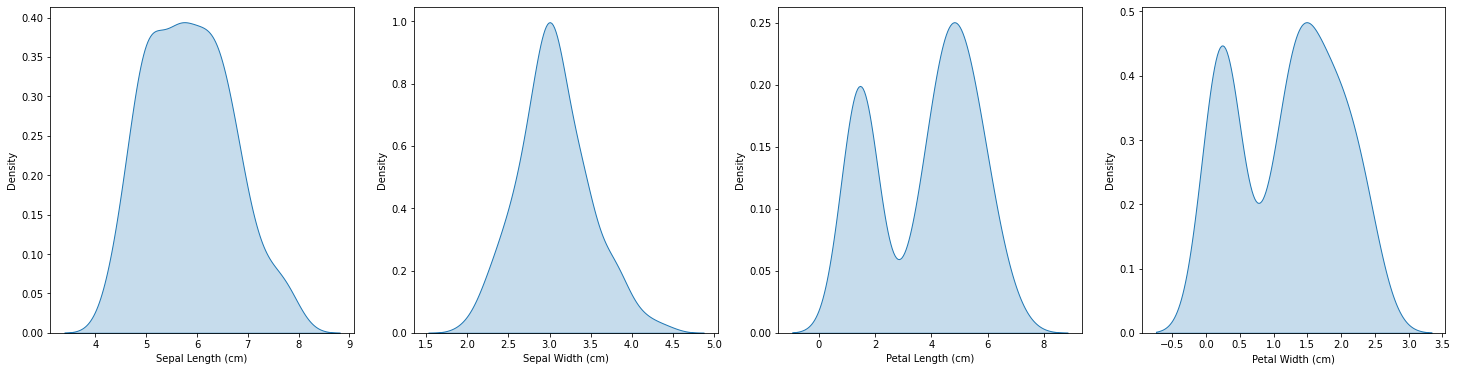

In [4]:
# Histogram 
cols=iris_data.columns[:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=iris_data[cols[0]], shade=True)
plt.subplot(142)
sns.kdeplot(data=iris_data[cols[1]], shade=True)
plt.subplot(143)
sns.kdeplot(data=iris_data[cols[2]], shade=True)
plt.subplot(144)
sns.kdeplot(data=iris_data[cols[3]], shade=True)
plt.show()

# 2D KDE plots

We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command. In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

<Figure size 576x432 with 0 Axes>

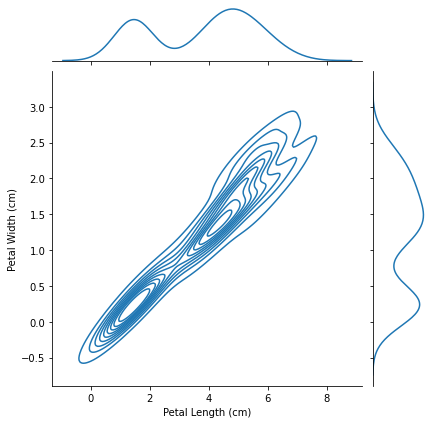

In [5]:
# 2D KDE plot
plt.figure(figsize=(8,6))
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Petal Width (cm)'], kind="kde")
plt.show()

# Color-coded plots

For the next part of the tutorial, we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In [6]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

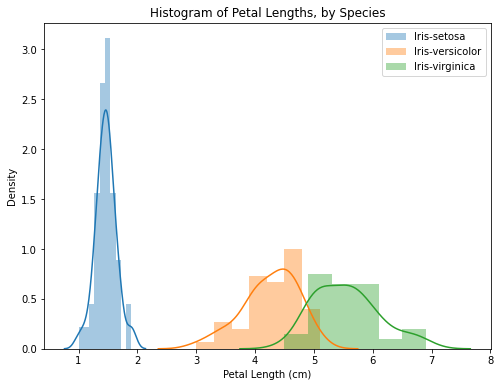

In [7]:
# Histograms for each species
plt.figure(figsize=(8,6))
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-setosa"]['Petal Length (cm)'], label="Iris-setosa", kde=True)
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-versicolor"]['Petal Length (cm)'], label="Iris-versicolor", kde=True)
sns.distplot(a=iris_data[iris_data["Species"]=="Iris-virginica"]['Petal Length (cm)'], label="Iris-virginica", kde=True)
# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()


# Finding the Best Distribution that Fits Your Data using Python’s Fitter Library

In [8]:
# https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
from fitter import Fitter, get_common_distributions, get_distributions

In [9]:
pl=iris_data["Petal Length (cm)"].values
pw=iris_data["Petal Width (cm)"].values
sl=iris_data["Sepal Length (cm)"].values
sw=iris_data["Sepal Width (cm)"].values
pl_se=iris_data[iris_data["Species"]=="Iris-setosa"]["Petal Length (cm)"].values
pl_ve=iris_data[iris_data["Species"]=="Iris-versicolor"]["Petal Length (cm)"].values
pl_vi=iris_data[iris_data["Species"]=="Iris-virginica"]["Petal Length (cm)"].values

In [10]:
pl_se

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

,sumsquare_error,aic,bic,kl_div
burr,2086.662680,83.149489,202.213005,inf
lognorm,2092.027104,67.550130,198.429358,inf
beta,2092.044697,69.494878,202.341801,inf
gamma,2092.047542,67.610281,198.429846,inf
norm,2092.097470,64.888740,194.519017,inf


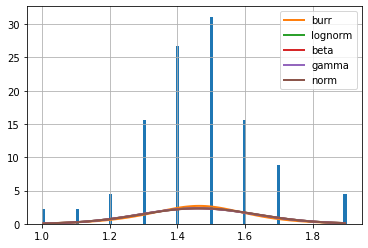

In [11]:
f = Fitter(pl_se,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

In [12]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 18.44942778163508,
  'd': 0.7194987566720354,
  'loc': -0.0632559851811422,
  'scale': 1.5661342542889851}}

,sumsquare_error,aic,bic,kl_div
lognorm,2092.027104,67.550130,198.429358,inf
gamma,2092.047542,67.610281,198.429846,inf
norm,2092.097470,64.888740,194.519017,inf
cauchy,2095.497978,111.363322,194.600221,inf
exponpow,2110.284835,28.987473,198.863829,inf


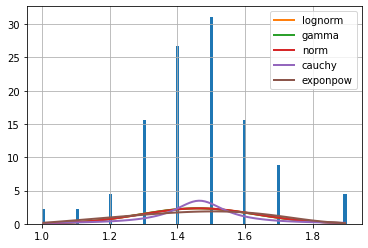

In [13]:
f = Fitter(pl_se, distributions= get_common_distributions())
f.fit()
f.summary()

In [14]:
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation

data = np.random.normal(mu, sigma, 10000)
data

array([ 0.11877826,  0.01883047, -0.0150671 , ..., -0.04128802,
        0.08268496,  0.13610653])

,sumsquare_error,aic,bic,kl_div
norm,1.473496,196.508979,-88208.606278,inf
lognorm,1.546743,197.884161,-87714.255187,inf
gamma,1.570001,196.251755,-87565.007312,inf
exponpow,16.360774,436.316476,-64126.906201,inf
cauchy,30.714558,96.008595,-57837.615469,inf


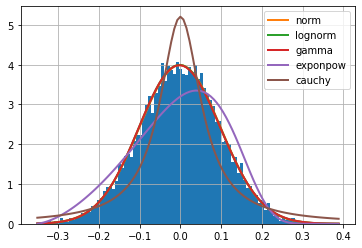

In [15]:
f = Fitter(data,
           distributions= get_common_distributions())
f.fit()
f.summary()

# Here we go...

https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

In [16]:
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]
asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

In [17]:
import scipy as sc
def check_normality(data):
    test_stat_normality, p_value_normality=sc.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [18]:
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])
check_normality(sync)
check_normality(asyncr)

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


In [19]:
check_normality(pl_se)
check_normality(pl_ve)
check_normality(pl_vi)

p value:0.0546
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1585
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1098
Fail to reject null hypothesis >> The data is normally distributed


In [20]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= sc.stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [21]:
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


In [22]:
check_variance_homogeneity(pl_se,pl_ve)

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


In [23]:
check_variance_homogeneity(pl_se,pl_vi)

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


In [24]:
check_variance_homogeneity(pl_vi,pl_ve)

p value:0.3041
Fail to reject null hypothesis >> The variances of the samples are same.


In [25]:
ttest,p_value = sc.stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


In [28]:
check_normality(pl_ve)

p value:0.1585
Fail to reject null hypothesis >> The data is normally distributed
